In [1]:
import torch
import cv2
import numpy as np

import config
from model import YOLOv3
from utils import (
    get_loaders,
    plot_couple_examples
)

torch.backends.cudnn.benchmark = True

/home/neik/miniconda3/envs/yolov3/lib/python3.7/site-packages/albumentations/imgaug/transforms.py:337: FutureWarning: This IAAAffine is deprecated. Please use Affine instead
  warnings.warn("This IAAAffine is deprecated. Please use Affine instead", FutureWarning)


In [2]:
model = YOLOv3(num_classes=20).to(config.DEVICE)
checkpoint = torch.load('my_checkpoint.pth.tar', map_location=config.DEVICE)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

train_loader, test_loader, train_eval_loader = get_loaders(
    train_csv_path=config.DATASET + "/train.csv",
    test_csv_path=config.DATASET + "/test.csv"
)

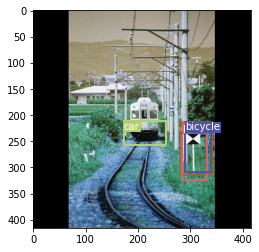

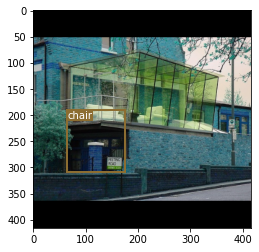

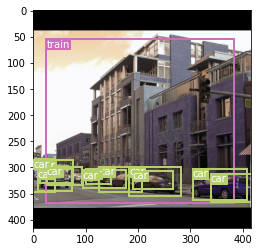

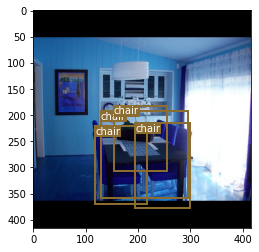

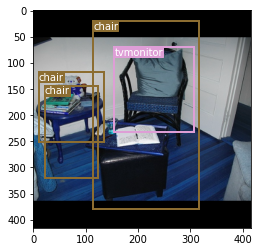

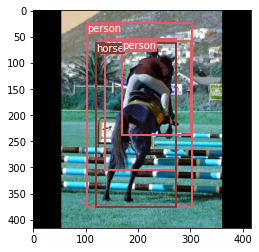

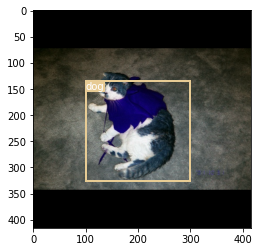

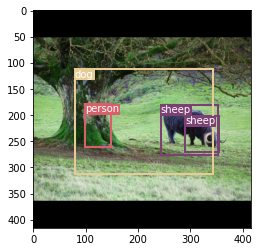

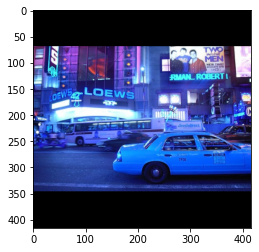

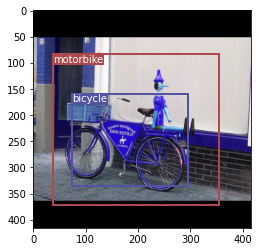

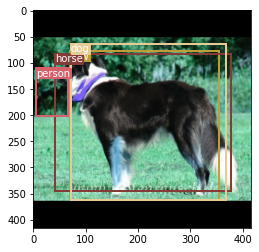

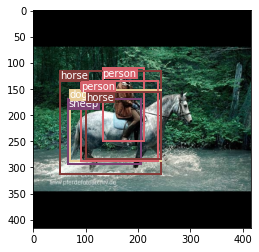

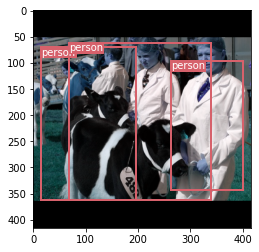

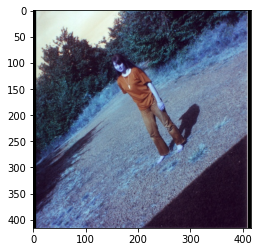

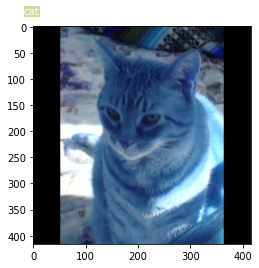

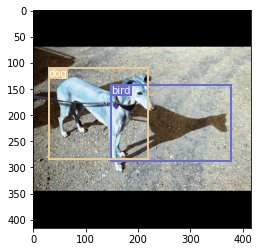

In [7]:
scaled_anchors = (
        torch.tensor(config.ANCHORS)
        * torch.tensor(config.S).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
    ).to(config.DEVICE)

plot_couple_examples(model, test_loader, 0.6, 0.5, scaled_anchors)